# Importing and processing data


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets.cifar10 import load_data
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

In [ ]:
(X_train, y_train), (X_test, y_test) = load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [ ]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)


In [ ]:
X_train = X_train / 255
X_test = X_test / 255

Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

In [ ]:
X_train_small = X_train[:10000]
Y_train_small = Y_train[:10000]

In [ ]:
X_train_small.shape

(10000, 32, 32, 3)

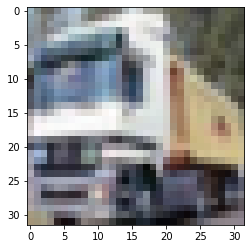

In [ ]:
i = 1
plt.imshow(X_train[i])

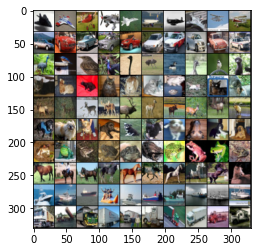

In [ ]:
final_image = np.zeros((330, 330, 3))
for c in range(10):
    class_images = X_train[Y_train.argmax(axis=-1) == c]
    for i in range(10):
        final_image[c * 33:c * 33 + 32, i * 33:i * 33 + 32, :] = class_images[i]

plt.imshow(final_image)

# normal VGG net

In [ ]:
del model

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D((2, 2), strides=(2, 2)))
# model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D((2, 2), strides=(2, 2)))
# model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D((2, 2), strides=(2, 2)))
# model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 8, 8, 128)        

In [ ]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
model.compile(optimizer=Adam(0.0001), loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(X_train, Y_train, batch_size=32, epochs=20, validation_split=0.2)

Epoch 1/20
1250/1250 [==============================] - 8s 6ms/step - loss: 1.5307 - acc: 0.4371 - val_loss: 1.1830 - val_acc: 0.5749
Epoch 2/20
1250/1250 [==============================] - 7s 5ms/step - loss: 1.0233 - acc: 0.6395 - val_loss: 0.9397 - val_acc: 0.6717
Epoch 3/20
1250/1250 [==============================] - 7s 5ms/step - loss: 0.8072 - acc: 0.7163 - val_loss: 0.8279 - val_acc: 0.7127
Epoch 4/20
1250/1250 [==============================] - 7s 6ms/step - loss: 0.6765 - acc: 0.7632 - val_loss: 0.7658 - val_acc: 0.7373
Epoch 5/20
1250/1250 [==============================] - 7s 6ms/step - loss: 0.5683 - acc: 0.8004 - val_loss: 0.7838 - val_acc: 0.7401
Epoch 6/20
1250/1250 [==============================] - 8s 6ms/step - loss: 0.4734 - acc: 0.8339 - val_loss: 0.7728 - val_acc: 0.7578
Epoch 7/20
1250/1250 [==============================] - 7s 6ms/step - loss: 0.3931 - acc: 0.8612 - val_loss: 0.7900 - val_acc: 0.7520
Epoch 8/20
1250/1250 [==============================] - 7s 6ms

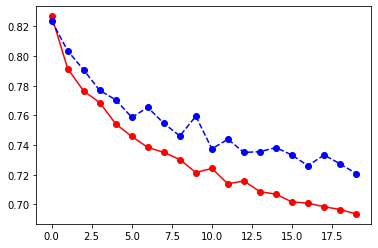

In [ ]:
plt.plot(history.history['loss'], 'r-o')
plt.plot(history.history['val_loss'], 'b--o')

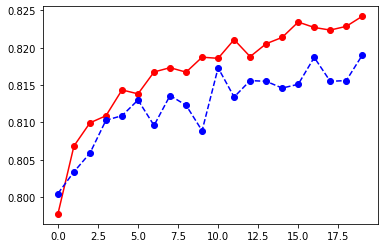

In [ ]:
plt.plot(history.history['acc'], 'r-o')
plt.plot(history.history['val_acc'], 'b--o')

In [ ]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.5461 - acc: 0.7351


[1.546142816543579, 0.7350999712944031]

In [ ]:
Pred = model.predict(X_test)
print(Pred.shape)

(10000, 10)


In [ ]:
Pred.argmax(axis=1)

array([3, 8, 0, ..., 5, 1, 7])

In [ ]:
model.save('model.mqd')
model.save_weights('model_weights.h5')

INFO:tensorflow:Assets written to: model.mqd/assets


In [ ]:
model = load_model('model.h5')

# first we have to build model 
model.load_weights('model_weights.h5')

# ImageDataGenerator toy example


In [ ]:
!wget https://files.worldwildlife.org/wwfcmsprod/images/Asian_Elephants_WW252891/carousel_small/6alkr00kmx_Asian_Elephants_WW252891.jpg

--2021-08-12 14:37:36--  https://files.worldwildlife.org/wwfcmsprod/images/Asian_Elephants_WW252891/carousel_small/6alkr00kmx_Asian_Elephants_WW252891.jpg
Resolving files.worldwildlife.org (files.worldwildlife.org)... 104.18.9.90, 104.18.8.90, 2606:4700::6812:95a, ...
Connecting to files.worldwildlife.org (files.worldwildlife.org)|104.18.9.90|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 113386 (111K) [image/jpeg]
Saving to: ‘6alkr00kmx_Asian_Elephants_WW252891.jpg’

6alkr00kmx_Asian_El 100%[===================>] 110.73K  --.-KB/s    in 0.02s   

2021-08-12 14:37:36 (6.55 MB/s) - ‘6alkr00kmx_Asian_Elephants_WW252891.jpg’ saved [113386/113386]



In [ ]:
import cv2
image = cv2.imread('6alkr00kmx_Asian_Elephants_WW252891.jpg')
image = image.reshape((-1,) + image.shape)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(
    # rotation_range=30,
    # width_shift_range=200,
    # height_shift_range=200,
    # brightness_range=(0.8, 1.2),
    # shear_range=50,
    # zoom_range=0.6,
    # fill_mode = 'constant',
    # cval=255,
    # horizontal_flip = True,
    # vertical_flip = True,
    # rescale=1/255.,
    # validation_split=0.2,
)


train_gen = datagen.flow(image, [0], batch_size=1, shuffle=False)

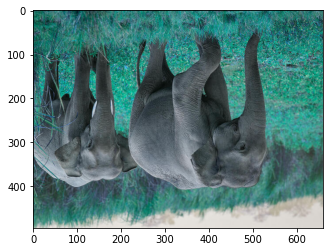

In [ ]:
X, y = train_gen.next()
plt.imshow(X[0].astype(np.uint8))

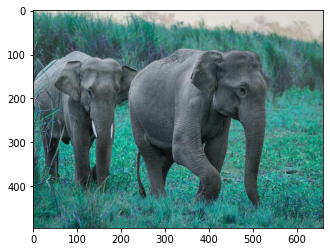

In [ ]:
plt.imshow(image[0])

# ImageDataGenerator

## flow from dataset

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=10,
    height_shift_range=10,
    brightness_range=(0.3, 1.8),
    shear_range=5,
    zoom_range=0.2,
    fill_mode = 'wrap',
    horizontal_flip = True,
    validation_split=0.2,
)

train_gen = datagen.flow(X_train_small, Y_train_small, batch_size=32, subset='training')
val_gen = datagen.flow(X_train_small, Y_train_small, batch_size=32, subset='validation')

## flow from directory

In [ ]:
!mkdir 'dataset'
!mkdir 'dataset/train'
!mkdir 'dataset/validation'

In [ ]:
import os
from tqdm import tqdm

In [ ]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'trucktruck']

for cls in classes:
    os.makedirs(os.path.join('dataset', 'train', cls))
    os.makedirs(os.path.join('dataset', 'validation', cls))

In [ ]:
data_split = int(X_train_small.shape[0] * 0.8)

for i in tqdm(range(X_train_small.shape[0])):
    cv2.imwrite(
        os.path.join(
            'dataset',
            'train' if i < data_split else 'validation',
            classes[Y_train_small[i].argmax()],
            '{}.jpg'.format(i)
        ),
        (X_train_small[i] * 255).astype(np.uint8)
    )

100%|██████████| 10000/10000 [00:00<00:00, 10188.94it/s]


In [ ]:
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=10,
    height_shift_range=10,
    brightness_range=(0.3, 1.8),
    shear_range=5,
    zoom_range=0.2,
    fill_mode = 'wrap',
    horizontal_flip = True,
    rescale=1/255.,
)

train_gen = datagen.flow_from_directory('dataset/train', target_size=(32, 32), batch_size=32)
val_gen = datagen.flow_from_directory('dataset/validation', target_size=(32, 32), batch_size=32)

Found 8000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


# generator VGG net

In [ ]:
del model

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D((2, 2), strides=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D((2, 2), strides=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D((2, 2), strides=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 8, 8, 128)        

In [ ]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
print(train_gen.n)
print(val_gen.n)

print(train_gen.n / 32)
print(val_gen.n / 32)

8000
2000
250.0
62.5


In [ ]:
history = model.fit_generator(train_gen, steps_per_epoch=250, epochs=30,
                              validation_data=val_gen, validation_steps=62)

Epoch 1/30
  3/250 [..............................] - ETA: 6s - loss: 1.4520 - acc: 0.4792

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


250/250 [==============================] - 8s 33ms/step - loss: 1.4296 - acc: 0.4845 - val_loss: 1.4366 - val_acc: 0.4808
Epoch 2/30
250/250 [==============================] - 9s 36ms/step - loss: 1.3940 - acc: 0.4922 - val_loss: 1.4432 - val_acc: 0.4844
Epoch 3/30
250/250 [==============================] - 9s 36ms/step - loss: 1.3675 - acc: 0.5050 - val_loss: 1.4820 - val_acc: 0.4748
Epoch 4/30
250/250 [==============================] - 9s 35ms/step - loss: 1.3850 - acc: 0.5055 - val_loss: 1.4323 - val_acc: 0.4864
Epoch 5/30
250/250 [==============================] - 8s 34ms/step - loss: 1.3766 - acc: 0.5031 - val_loss: 1.4469 - val_acc: 0.4723
Epoch 6/30
250/250 [==============================] - 8s 33ms/step - loss: 1.3764 - acc: 0.5066 - val_loss: 1.4553 - val_acc: 0.4894
Epoch 7/30
250/250 [==============================] - 8s 33ms/step - loss: 1.3687 - acc: 0.5052 - val_loss: 1.3873 - val_acc: 0.5116
Epoch 8/30
250/250 [==============================] - 8s 33ms/step - loss: 1.366

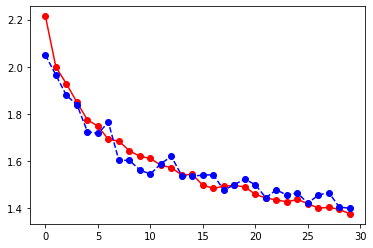

In [ ]:
plt.plot(history.history['loss'], 'r-o')
plt.plot(history.history['val_loss'], 'b--o')

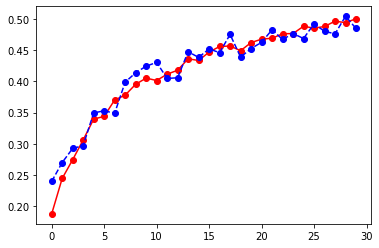

In [ ]:
plt.plot(history.history['acc'], 'r-o')
plt.plot(history.history['val_acc'], 'b--o')

In [ ]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 4ms/step - loss: 1.1220 - acc: 0.7246


[1.1219911575317383, 0.7246000170707703]

In [ ]:
model.evaluate(X_val, Y_val)

125/125 [==============================] - 0s 3ms/step - loss: 1.1379 - acc: 0.7220


[1.1378703117370605, 0.722000002861023]